## Regressors

      There are many machine learning algorithms for Regression, but deciding best number of features and best model for getting best accuracy is typical. When we select a model for prediction, then we suffer problems related to underfitting and overfitting. In real scenario, there are more cases of overfitting, which we solve through regulariztion and hyperparameter tuning. Here, I implemented the following models to check best out of them for this cars dataset:
      
              1. Linear Regression
              2. Lasso Regression
              3. Ridge Regression
              4. Elastic Net Regression
              5. Least Angle Regression
              6. Stochastic Gradient Descent Regression
              7. Support Vector Regression
              8. K Neighbors Regression
              9. Decision Tree Regression
              10. Random Forest Regression
              11. XG Boost Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Importing Libraries...

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Loading Data...

In [3]:
data = pd.read_csv("/kaggle/input/cars-dataset/mtcars2.csv")
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3


### Renaming column

In [4]:
data = data.rename(columns = {"Unnamed: 0":"Model"})
data.head()

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3


## EDA

In [5]:
data.shape

(44, 12)

In [6]:
nulldata = data.isnull().sum()
nulldata[nulldata>0]

Series([], dtype: int64)

In [7]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,19.722727,6.318182,244.556818,146.795455,3.559773,3.327750,17.750227,0.409091,0.363636,3.568182,2.727273
std,6.780679,1.827092,134.989997,66.454244,0.559657,1.113763,1.535409,0.497350,0.486607,0.695424,1.515250
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,15.200000,4.000000,120.250000,96.500000,3.077500,2.465000,17.020000,0.000000,0.000000,3.000000,2.000000
50%,18.400000,7.000000,266.900000,150.000000,3.580000,3.435000,17.420000,0.000000,0.000000,3.000000,2.000000
75%,22.800000,8.000000,350.250000,186.250000,3.920000,3.780000,18.520000,1.000000,1.000000,4.000000,4.000000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   44 non-null     object 
 1   mpg     44 non-null     float64
 2   cyl     44 non-null     int64  
 3   disp    44 non-null     float64
 4   hp      44 non-null     int64  
 5   drat    44 non-null     float64
 6   wt      44 non-null     float64
 7   qsec    44 non-null     float64
 8   vs      44 non-null     int64  
 9   am      44 non-null     int64  
 10  gear    44 non-null     int64  
 11  carb    44 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 4.2+ KB


In [9]:
data = data.drop('Model',axis=1)
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3


In [10]:
data = data.rename(columns={'cyl':'cylinder','disp' : 'displacement','hp':'horsepower','wt':'weight'})
data.head()

,mpg,cylinder,displacement,horsepower,drat,weight,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3


### Selecting main columns for analysis

In [11]:
data = data[['mpg','cylinder','displacement','horsepower','weight','qsec']]
data.head()

,mpg,cylinder,displacement,horsepower,weight,qsec
0,21.0,6,160.0,110,2.620,16.46
1,21.0,6,160.0,110,2.875,17.02
2,22.8,4,108.0,93,2.320,18.61
3,21.4,6,258.0,110,3.215,19.44
4,15.2,8,275.8,180,3.780,18.00


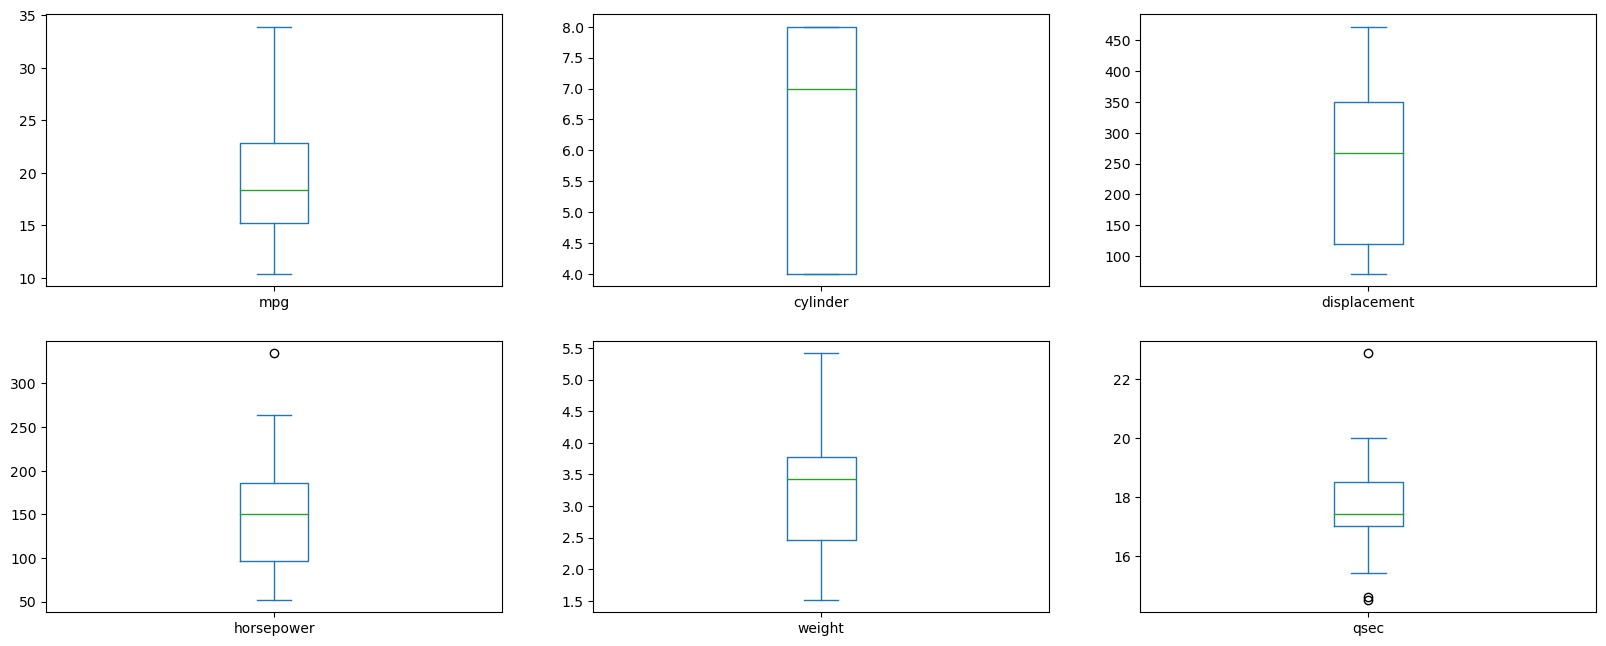

In [12]:
data.plot(kind = 'box',subplots = True, layout = (3,3),figsize = (20,12))
plt.show()

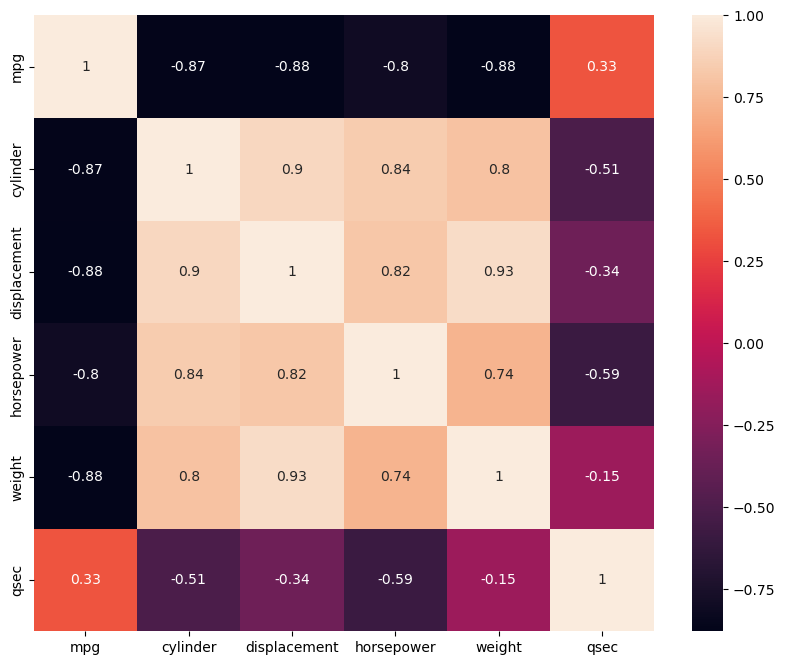

In [13]:
plt.subplots(figsize = (10,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

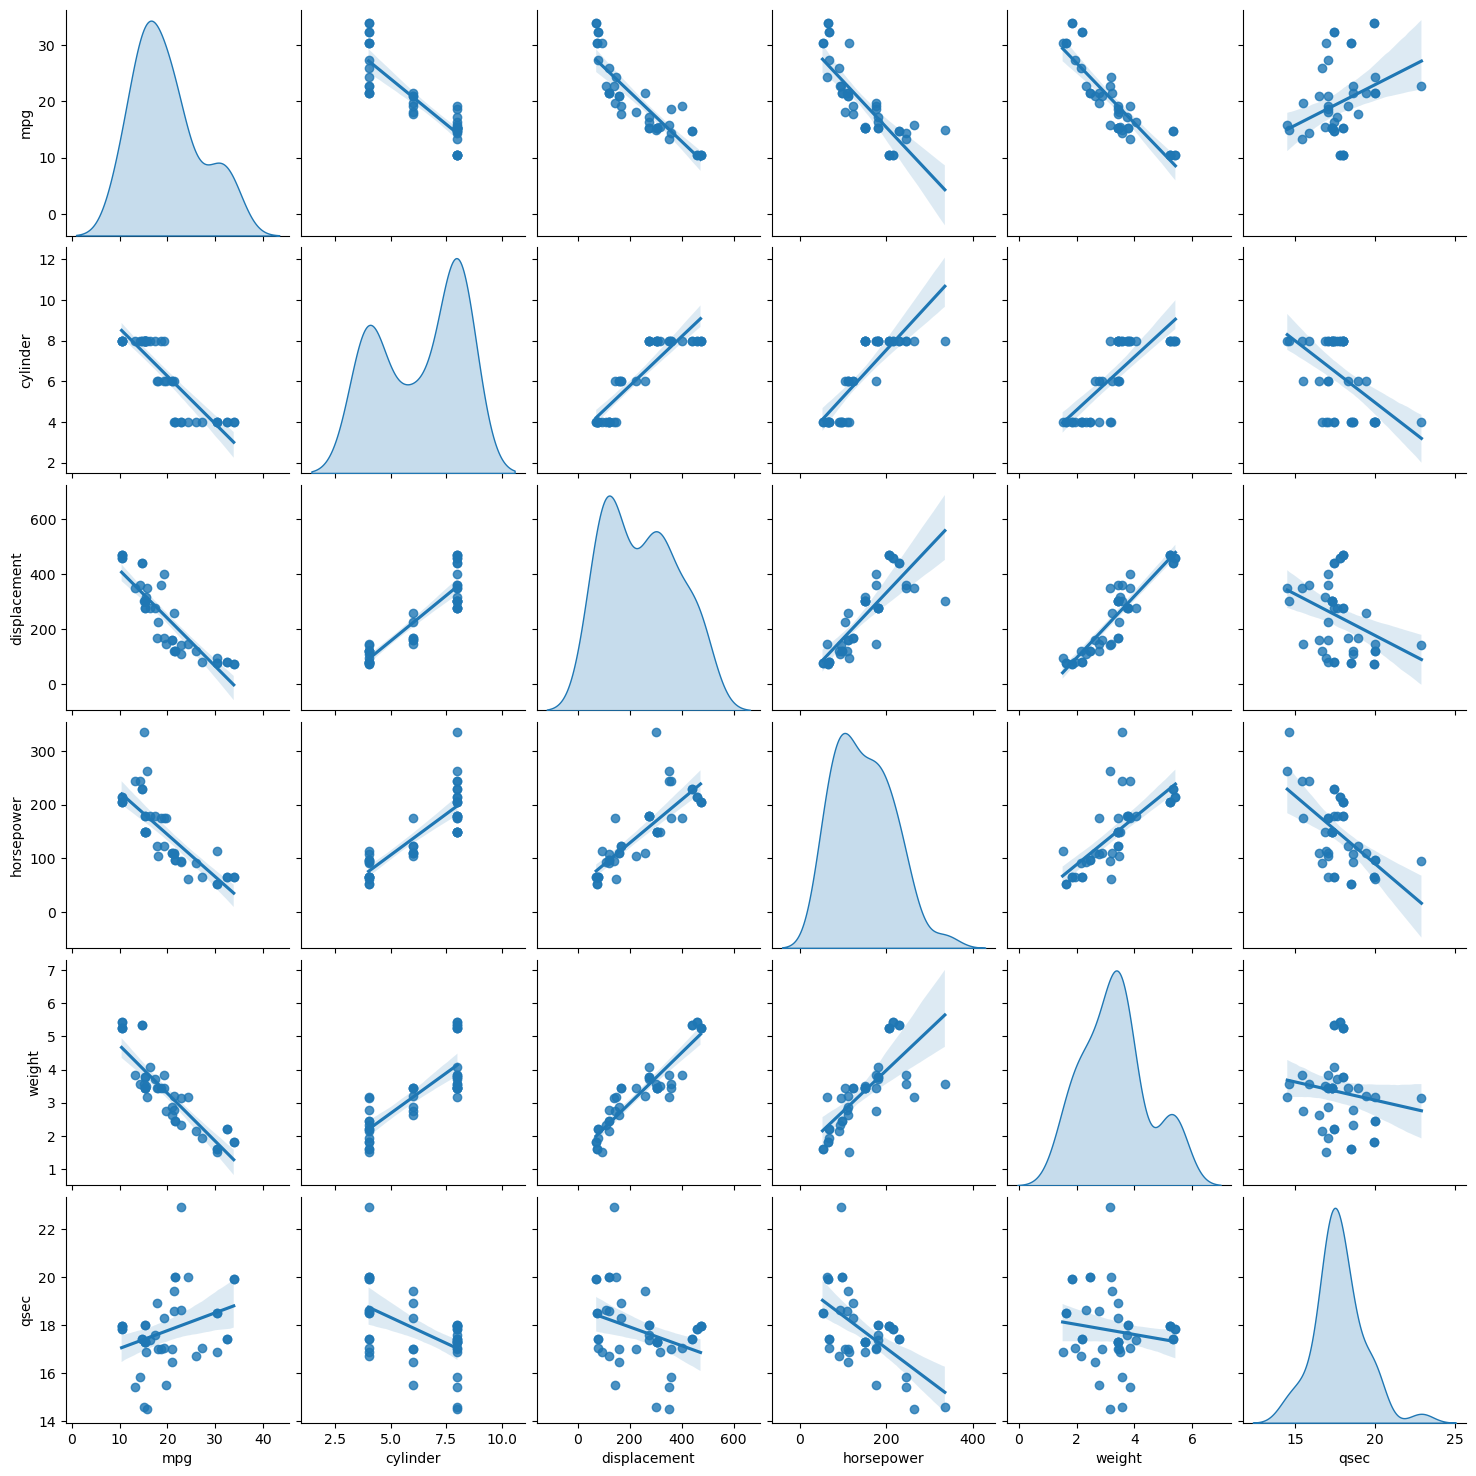

In [14]:
sns.pairplot(data,diag_kind='kde',kind='reg')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### Helper Functions 

In [16]:
def build_model(regression_fn,dataset,x_col,y_col,test_frac,preprocess_fn=None,show_plot = False):
    X = dataset[x_col]
    Y = dataset[y_col]
      
    if preprocess_fn is not None:
        preprocess = preprocess_fn()
        X = preprocess.fit_transform(X)
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_frac)
    model = regression_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print("Training Score : ",model.score(x_train,y_train))
    print("Testing Score : ",r2_score(y_test,y_pred))
    
    if show_plot is True:
        plt.plot(y_pred,label = 'Predictions')
        plt.plot(y_test.values,label = 'Actual')
        plt.legend()
        plt.show()
     
    return{'training score':model.score(x_train,y_train),
           'testing score': r2_score(y_test,y_pred)}    
    

In [17]:
results_dict = {}

In [18]:
def compare_results():
    for key in results_dict:
        print("Regression : ",key)
        print("Training Score : ",results_dict[key]['training score'])
        print("Testing Score : ",results_dict[key]['testing score'])
        print()

In [19]:
def overfitting():
    overfitting_regression = []
    print("These are the overfitting models : \n")
    for key in results_dict:
        if (results_dict[key]['training score'] > results_dict[key]['testing score']+0.02):
            print("Regression : ",key)
            print("Training Score : ",results_dict[key]['training score'])
            print("Testing Score : ",results_dict[key]['testing score'])
            print()
            overfitting_regression.append(key)
    print("No. of Overfitting models : ",len(overfitting_regression))
    for i in overfitting_regression:
        print(i)            

In [20]:
def underfitting():
    underfitting_regression = []
    print("These are the underfitting models : \n")
    for key in results_dict:
        if (results_dict[key]['training score'] < results_dict[key]['testing score']-0.02):
            print("Regression : ",key)
            print("Training Score : ",results_dict[key]['training score'])
            print("Testing Score : ",results_dict[key]['testing score'])
            print()
            underfitting_regression.append(key)
    print("No. of Underfitting models : ",len(underfitting_regression))
    for i in underfitting_regression:
        print(i)            

In [21]:
def balanced():
    balanced_regression = []
    print("Best models among all the models : \n")
    for key in results_dict:
        if ((results_dict[key]['training score'] < results_dict[key]['testing score']+0.02)
            and (results_dict[key]['training score'] > results_dict[key]['testing score']-0.02)) :
            print("Regression : ",key)
            print("Training Score : ",results_dict[key]['training score'])
            print("Testing Score : ",results_dict[key]['testing score'])
            print()
            balanced_regression.append(key)
    print("No. of Balanced models : ",len(balanced_regression))
    for i in balanced_regression:
        print(i)

### Importing all Regressor Functions 

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [23]:
def linear_reg(x_train,y_train):
    model = LinearRegression()
    model.fit(x_train,y_train)
    return model

In [24]:
def lasso_reg(x_train,y_train,alpha = 0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    return model

In [25]:
def ridge_reg(x_train,y_train,alpha = 0.5):
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    return model

In [26]:
def elastic_net_reg(x_train,y_train,alpha = 1, l1_ratio = 0.5, warm_start = True,max_iter = 10000):
    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,warm_start=warm_start,max_iter=max_iter)
    model.fit(x_train,y_train)
    return model

In [27]:
def lars_reg(x_train,y_train,n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train,y_train)
    return model

In [28]:
def sgd_reg(x_train,y_train,max_iter = 10000,tol = 1e-3):
    model = SGDRegressor(max_iter=max_iter,tol=tol)
    model.fit(x_train,y_train)
    return model

In [29]:
def svr_reg(x_train,y_train,kernel='linear',epsilon = 0.05, C = 0.3):
    model = SVR(kernel=kernel,epsilon=epsilon,C=C)
    model.fit(x_train,y_train)
    return model


In [30]:
def kneighbor_reg(x_train,y_train,n_neighbors = 10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    return model


In [31]:
def decisiontree_reg(x_train,y_train,max_depth = 2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train,y_train)
    return model

In [32]:
def randomforest_reg(x_train,y_train,max_depth = 2):
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(x_train,y_train)
    return model

In [33]:
def xgb_reg(x_train,y_train):
    model = XGBRegressor()
    model.fit(x_train,y_train)
    return model

Training Score :  0.8017639451904168
Testing Score :  -0.2737863834071508


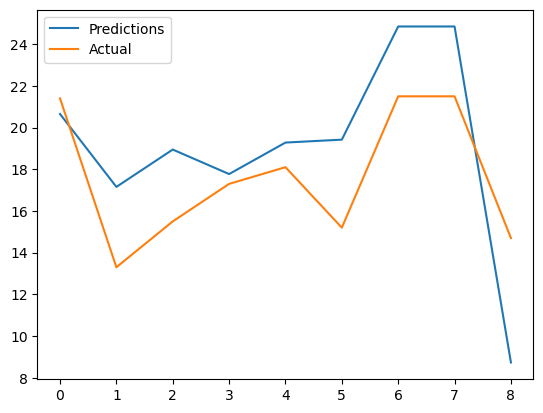

In [34]:
results_dict['Single Linear'] = build_model(linear_reg,data,['weight'],'mpg',0.2,None,True)

Training Score :  0.8766409332554357
Testing Score :  0.5817259602408953


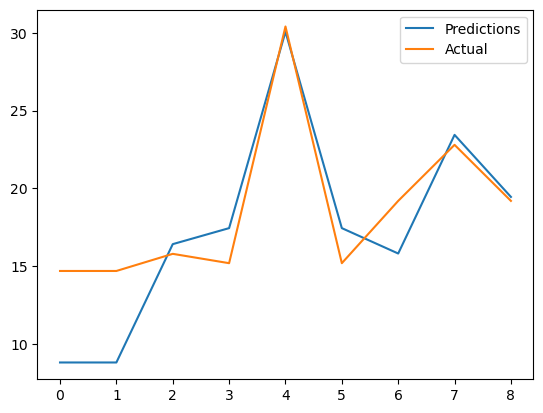

In [35]:
results_dict['Multi Linear all'] = build_model(linear_reg,data,
                                                     ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.856662696512661
Testing Score :  0.8250063438552551


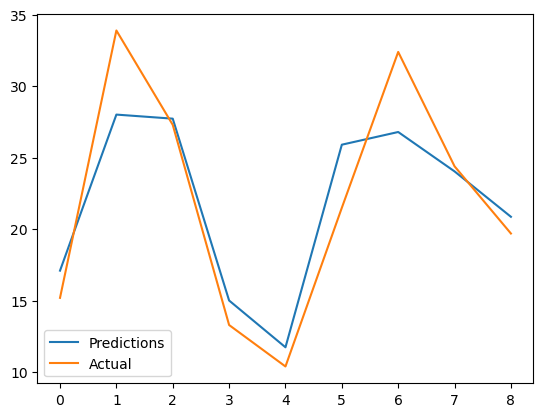

In [36]:
results_dict['Multi Linear 4 features'] = build_model(linear_reg,data,
                                                            ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.7553105928908428
Testing Score :  0.6274767273506688


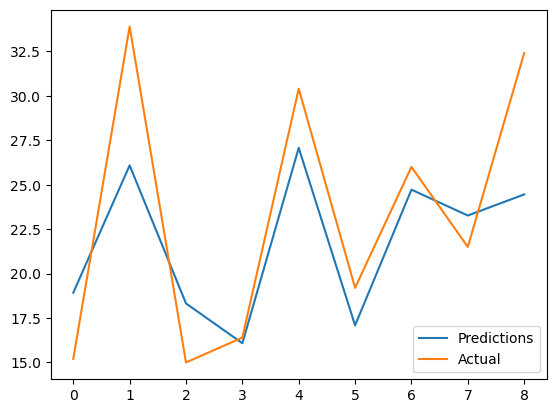

In [37]:
results_dict['Single Lasso'] = build_model(lasso_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8545112708407343
Testing Score :  0.796163792489997


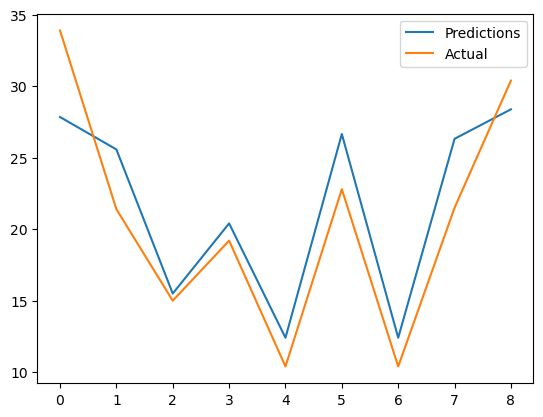

In [38]:
results_dict['Multi Lasso all'] = build_model(lasso_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8675942794175832
Testing Score :  0.7072110144747569


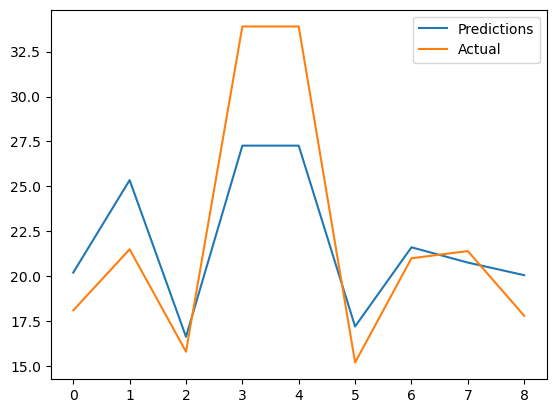

In [39]:
results_dict['Multi Lasso 4 features'] = build_model(lasso_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.7722073812046828
Testing Score :  0.3110780958908692


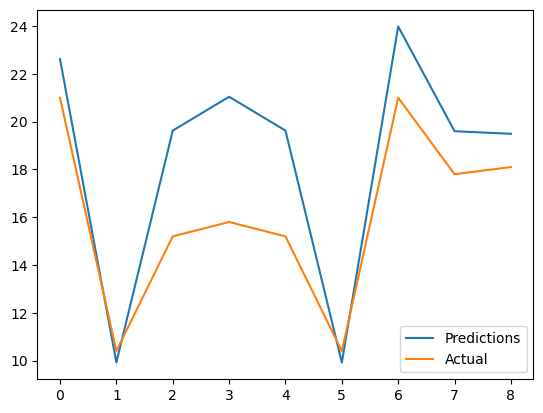

In [40]:
results_dict['Single Ridge'] = build_model(ridge_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8473115210659747
Testing Score :  0.8704849719673946


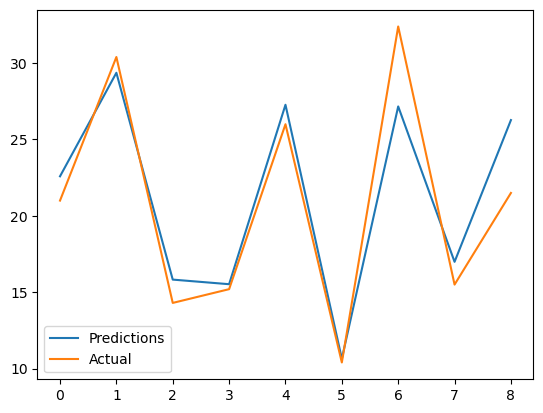

In [41]:
results_dict['Multi Ridge all'] = build_model(ridge_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8544925904407945
Testing Score :  0.8337871375413703


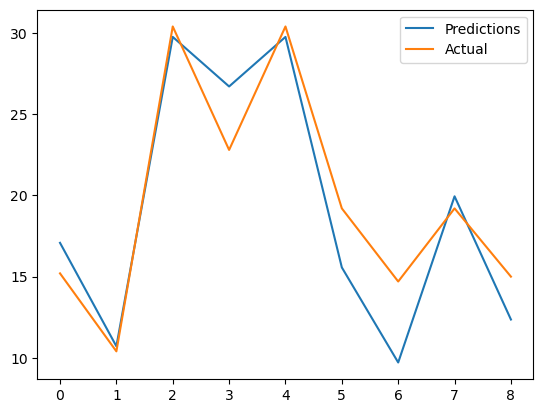

In [42]:
results_dict['Multi Ridge 4 features'] = build_model(ridge_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,None,True)

Training Score :  0.6563111030834503
Testing Score :  0.5870360683533506


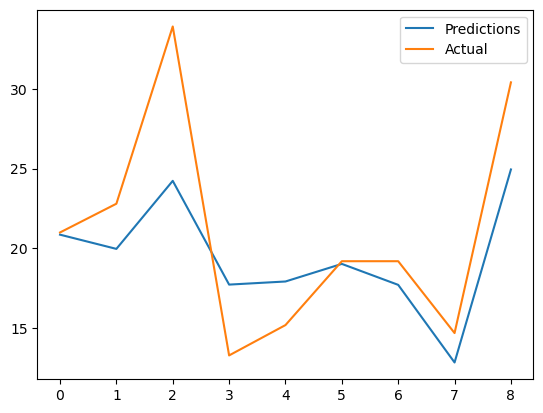

In [43]:
results_dict['Single Elastic net'] = build_model(elastic_net_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.7719114649681247
Testing Score :  0.8637462251575481


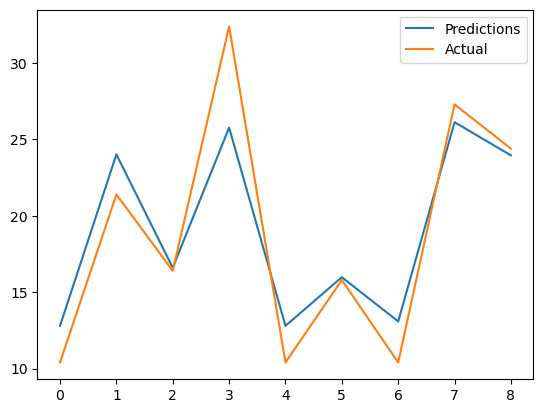

In [44]:
results_dict['Multi Elastic net all'] = build_model(elastic_net_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.7974584061737604
Testing Score :  0.7133177090182167


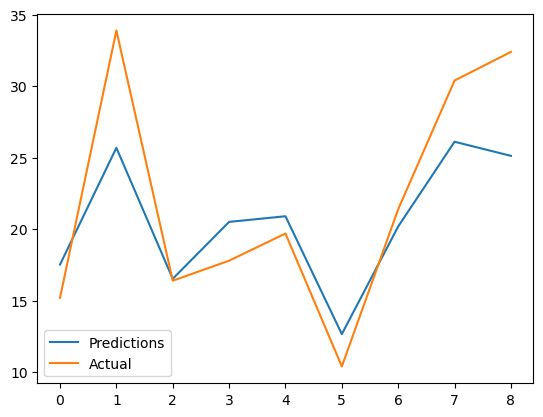

In [45]:
results_dict['Multi Elastic net 4 features'] = build_model(elastic_net_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8068283531390094
Testing Score :  0.5990115010514843


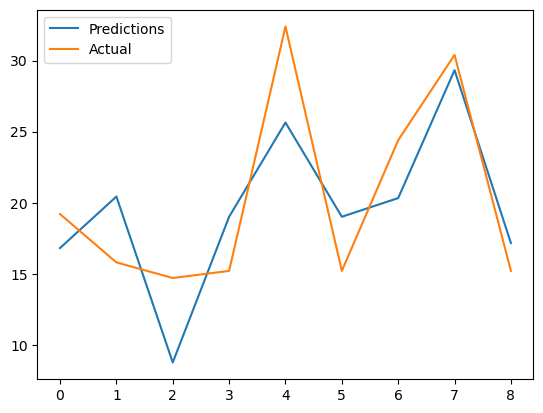

In [46]:
results_dict['Single Lars'] = build_model(lars_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8379093491910881
Testing Score :  0.9486157690028233


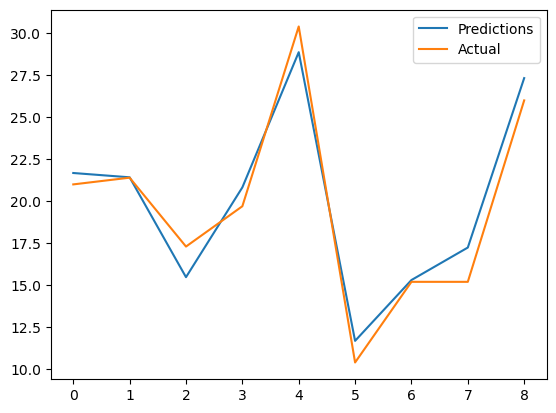

In [47]:
results_dict['Multi Lars all'] = build_model(lars_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8631338830210595
Testing Score :  0.7717972137720515


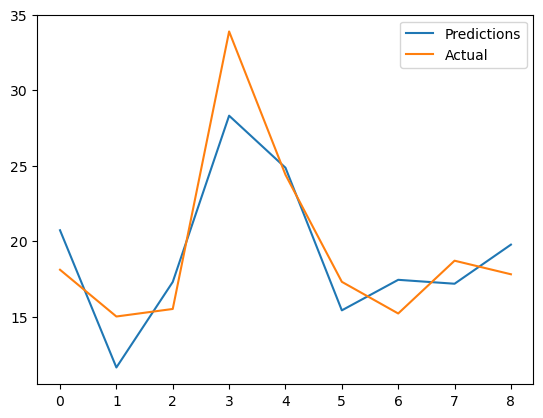

In [48]:
results_dict['Multi Lars 4 features'] = build_model(lars_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,None,True)

Training Score :  0.6626606992869704
Testing Score :  0.529135266708383


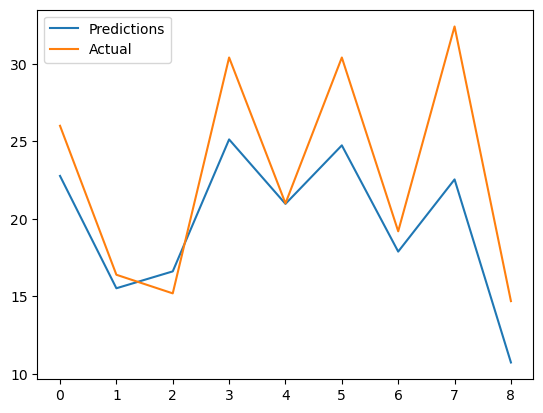

In [49]:
results_dict['Single SVR'] = build_model(svr_reg,data,['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.7809945587173387
Testing Score :  0.6462404509373523


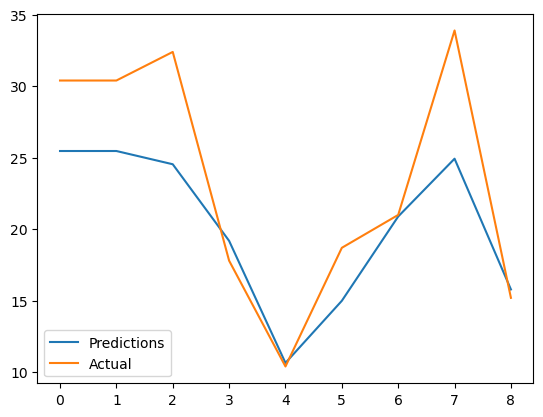

In [50]:
results_dict['Multi SVR all'] = build_model(svr_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8047360413809816
Testing Score :  0.9053962130980631


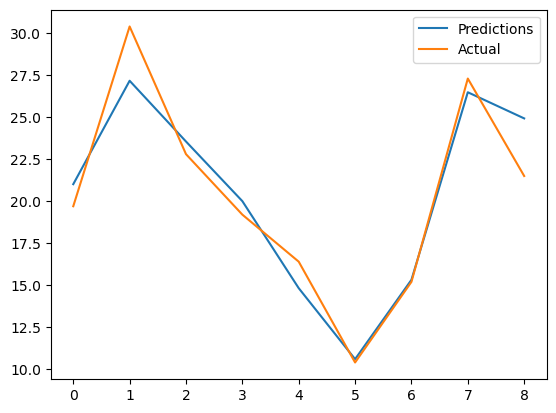

In [51]:
results_dict['Multi SVR 4 features'] = build_model(svr_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.7607430686679868
Testing Score :  0.7591703390606414


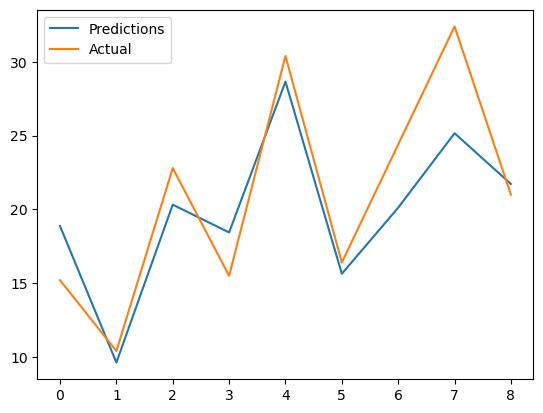

In [52]:
results_dict['Single SGD'] = build_model(sgd_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8746745964601741
Testing Score :  0.10870397329601633


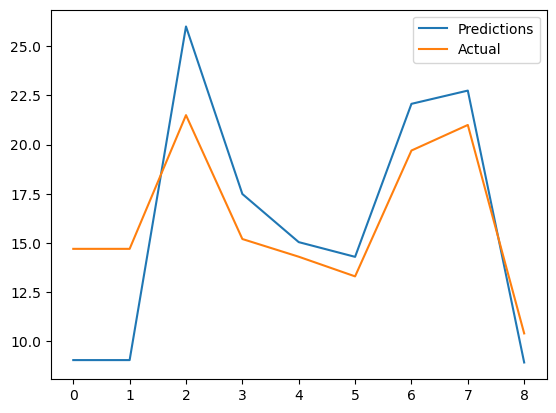

In [53]:
results_dict['Multi SGD all'] = build_model(sgd_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.85339251791459
Testing Score :  0.6033821152947425


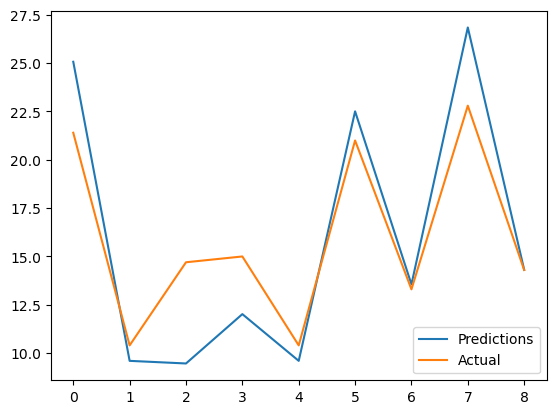

In [54]:
results_dict['Multi SGD 4 features'] = build_model(sgd_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8246413709410098
Testing Score :  0.6257876965674669


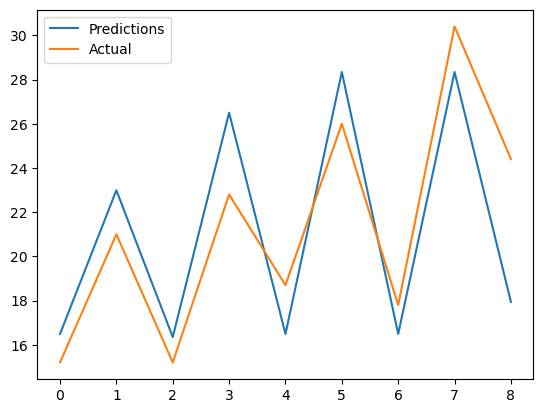

In [55]:
results_dict['Single Kneighbors'] = build_model(kneighbor_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8451482474220884
Testing Score :  0.8133925909567713


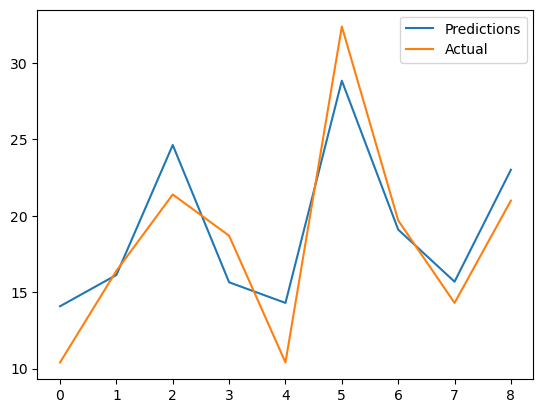

In [56]:
results_dict['Multi Kneighbors all'] = build_model(kneighbor_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.825518985594762
Testing Score :  0.845426954963749


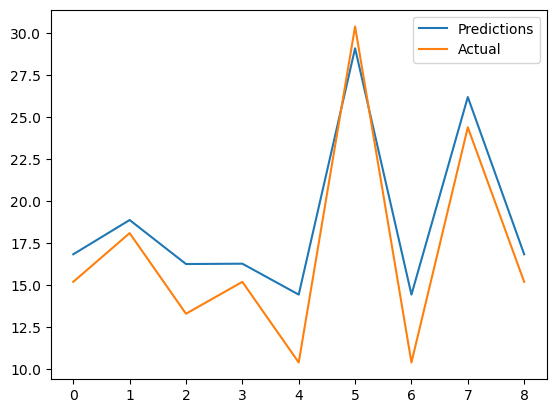

In [57]:
results_dict['Multi Kneighbors 4 features'] = build_model(kneighbor_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8354303203924165
Testing Score :  0.9068097188511328


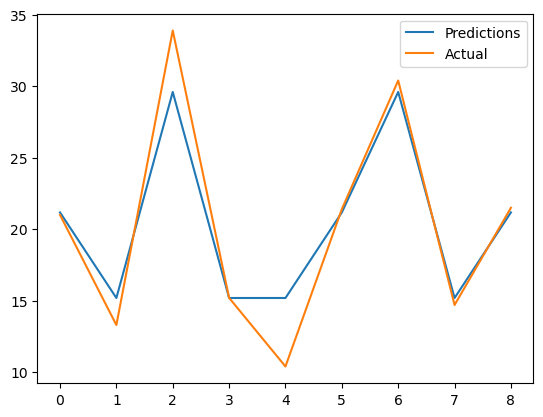

In [58]:
results_dict['Single Decision tree'] = build_model(decisiontree_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.9349659747673291
Testing Score :  0.8569669052357066


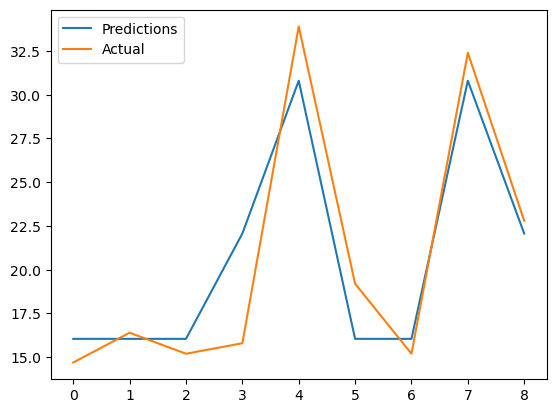

In [59]:
results_dict['Multi Decision tree all'] = build_model(decisiontree_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8993989409560895
Testing Score :  0.8611579147125005


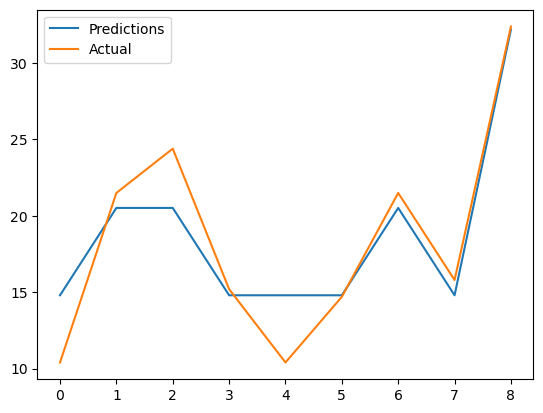

In [60]:
results_dict['Multi Decision tree 4 features'] = build_model(decisiontree_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.8972261241050824
Testing Score :  0.7530986158895797


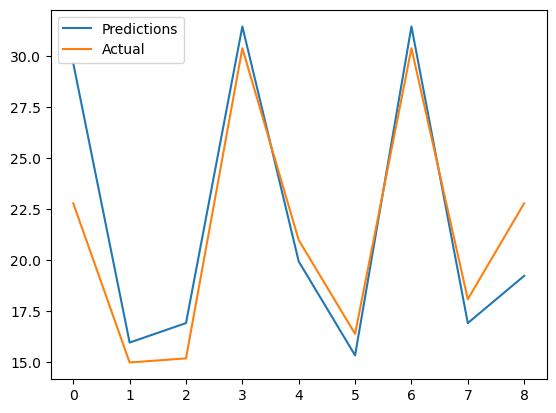

In [61]:
results_dict['Single Random Forest'] = build_model(randomforest_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.9357134401946805
Testing Score :  0.947595755269146


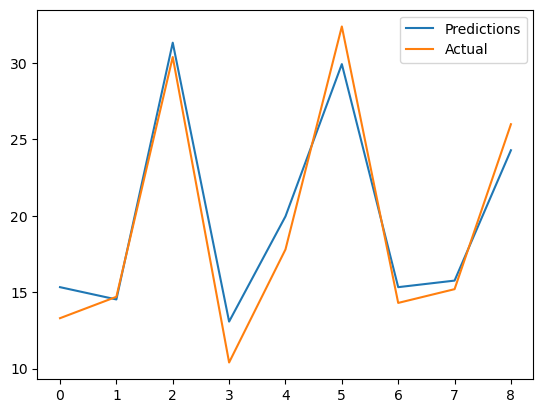

In [62]:
results_dict['Multi Random Forest all'] = build_model(randomforest_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.9445951392539352
Testing Score :  0.8846629149266627


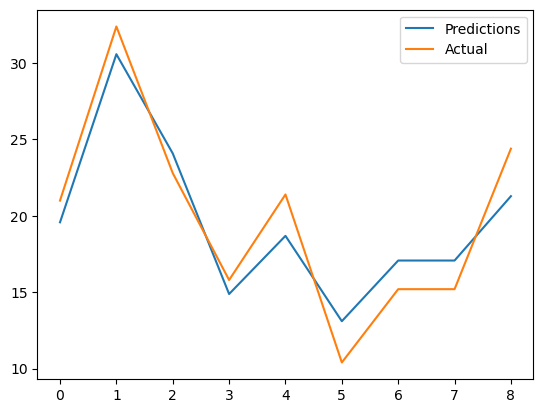

In [63]:
results_dict['Multi Random Forest 4 features'] = build_model(randomforest_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.999214283468536
Testing Score :  0.9809721092712029


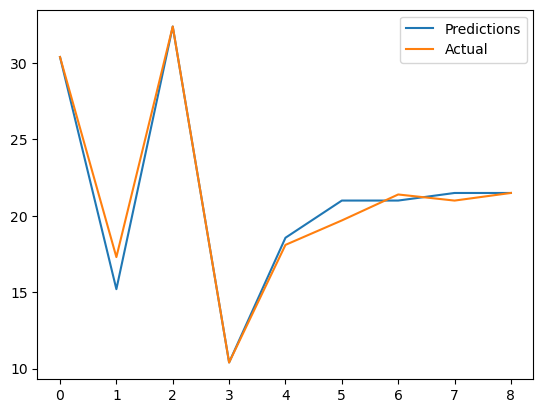

In [64]:
results_dict['Single xgb'] = build_model(xgb_reg,data,
                                                    ['weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.999999968502053
Testing Score :  0.9326217538193339


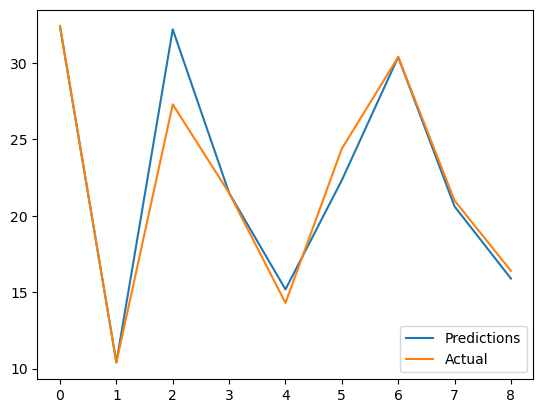

In [65]:
results_dict['Multi xgb all'] = build_model(xgb_reg,data,
                                                    ['cylinder','displacement','horsepower','qsec','weight'],'mpg',0.2,StandardScaler,True)

Training Score :  0.9999999867074373
Testing Score :  0.9000207306155068


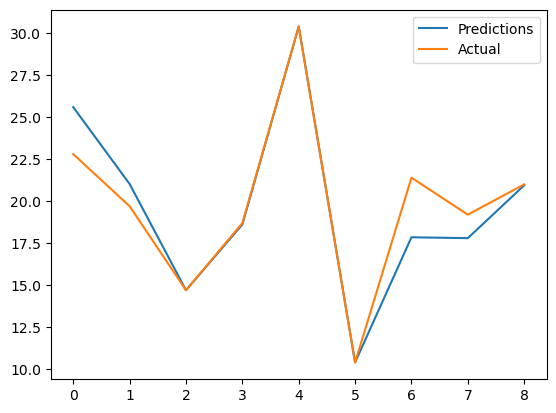

In [66]:
results_dict['Multi xgb 4 features'] = build_model(xgb_reg,data,
                                                    ['cylinder','displacement','horsepower','weight'],'mpg',0.2,StandardScaler,True)

### Comparing all the results of applied Regressor functions with number of features

In [67]:
compare_results()

Regression :  Single Linear
Training Score :  0.8017639451904168
Testing Score :  -0.2737863834071508

Regression :  Multi Linear all
Training Score :  0.8766409332554357
Testing Score :  0.5817259602408953

Regression :  Multi Linear 4 features
Training Score :  0.856662696512661
Testing Score :  0.8250063438552551

Regression :  Single Lasso
Training Score :  0.7553105928908428
Testing Score :  0.6274767273506688

Regression :  Multi Lasso all
Training Score :  0.8545112708407343
Testing Score :  0.796163792489997

Regression :  Multi Lasso 4 features
Training Score :  0.8675942794175832
Testing Score :  0.7072110144747569

Regression :  Single Ridge
Training Score :  0.7722073812046828
Testing Score :  0.3110780958908692

Regression :  Multi Ridge all
Training Score :  0.8473115210659747
Testing Score :  0.8704849719673946

Regression :  Multi Ridge 4 features
Training Score :  0.8544925904407945
Testing Score :  0.8337871375413703

Regression :  Single Elastic net
Training Score : 

### Overfitting models

In [68]:
overfitting()

These are the overfitting models : 

Regression :  Single Linear
Training Score :  0.8017639451904168
Testing Score :  -0.2737863834071508

Regression :  Multi Linear all
Training Score :  0.8766409332554357
Testing Score :  0.5817259602408953

Regression :  Multi Linear 4 features
Training Score :  0.856662696512661
Testing Score :  0.8250063438552551

Regression :  Single Lasso
Training Score :  0.7553105928908428
Testing Score :  0.6274767273506688

Regression :  Multi Lasso all
Training Score :  0.8545112708407343
Testing Score :  0.796163792489997

Regression :  Multi Lasso 4 features
Training Score :  0.8675942794175832
Testing Score :  0.7072110144747569

Regression :  Single Ridge
Training Score :  0.7722073812046828
Testing Score :  0.3110780958908692

Regression :  Multi Ridge 4 features
Training Score :  0.8544925904407945
Testing Score :  0.8337871375413703

Regression :  Single Elastic net
Training Score :  0.6563111030834503
Testing Score :  0.5870360683533506

Regression

### Underfitting models

In [69]:
underfitting()

These are the underfitting models : 

Regression :  Multi Ridge all
Training Score :  0.8473115210659747
Testing Score :  0.8704849719673946

Regression :  Multi Elastic net all
Training Score :  0.7719114649681247
Testing Score :  0.8637462251575481

Regression :  Multi Lars all
Training Score :  0.8379093491910881
Testing Score :  0.9486157690028233

Regression :  Multi SVR 4 features
Training Score :  0.8047360413809816
Testing Score :  0.9053962130980631

Regression :  Single Decision tree
Training Score :  0.8354303203924165
Testing Score :  0.9068097188511328

No. of Underfitting models :  5
Multi Ridge all
Multi Elastic net all
Multi Lars all
Multi SVR 4 features
Single Decision tree


### Balanced Models

In [70]:
balanced()

Best models among all the models : 

Regression :  Single SGD
Training Score :  0.7607430686679868
Testing Score :  0.7591703390606414

Regression :  Multi Kneighbors 4 features
Training Score :  0.825518985594762
Testing Score :  0.845426954963749

Regression :  Multi Random Forest all
Training Score :  0.9357134401946805
Testing Score :  0.947595755269146

Regression :  Single xgb
Training Score :  0.999214283468536
Testing Score :  0.9809721092712029

No. of Balanced models :  4
Single SGD
Multi Kneighbors 4 features
Multi Random Forest all
Single xgb


### Finding best model with number of features with best training and testing score

In [71]:
results = pd.DataFrame(results_dict).transpose()
best = results[(results['training score']< results['testing score'] + 0.02)& (results['training score']>results['testing score'] - 0.02)]
best_model = best.groupby(best.index)[['training score','testing score']].max().sort_values(by = ['testing score'],ascending=False).head(1)
print(f"Best Model with best training and best testing score for this dataset :\n\n{best_model}")

Best Model with best training and best testing score for this dataset :

            training score  testing score
Single xgb        0.999214       0.980972


### Cons of this idea:
##### Everytime you run the model, it generates new overfitted, underfitted, and balanced best models.
